# Phase 2 - Step 2: Data Exploration
### Spotify Song Popularity Predictor 🎵

**Goal:**  
Explore and understand the combined Spotify dataset to identify:
- Column meanings and data types  
- Missing values and data quality issues  
- Basic distributions of key features (danceability, energy, tempo, etc.)  
- Early correlations with song popularity

We'll use visual and statistical methods to prepare for cleaning and feature engineering.


In [1]:
import os
os.chdir("..")


In [ ]:
# Import Required Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.compute_vif import compute_and_print_vif_from_config

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["figure.figsize"] = (20, 6)

import logging
logging.getLogger('matplotlib.pyplot').setLevel(logging.WARNING)


from src.utils.logger import Logger
from src.utils.helper import get_config

Initialized logger...


In [3]:
# Initialize Logger and Config

logger = Logger().get_logger(__name__)
config = get_config()

logger.info("Starting Data Exploration phase...")

2025-10-13 15:10:16 | INFO     | __main__ | Starting Data Exploration phase...


In [4]:
# Load the Combined Dataset

data_Path = config["data"]["processed"]["combined"]
df = pd.read_csv(data_Path)

df.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            4830 non-null   float64
 1   track_popularity          4831 non-null   int64  
 2   speechiness               4830 non-null   float64
 3   danceability              4830 non-null   float64
 4   playlist_name             4831 non-null   object 
 5   track_artist              4831 non-null   object 
 6   duration_ms               4830 non-null   float64
 7   energy                    4830 non-null   float64
 8   playlist_genre            4831 non-null   object 
 9   playlist_subgenre         4831 non-null   object 
 10  track_href                4830 non-null   object 
 11  track_name                4831 non-null   object 
 12  mode                      4830 non-null   float64
 13  uri                       4830 non-null   object 
 14  type    

In [6]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_signature,4830.0,3.936646,0.409712,1.000000,4.000000,4.000000,4.00000,5.000
track_popularity,4831.0,54.761126,19.828573,11.000000,41.000000,56.000000,72.00000,100.000
speechiness,4830.0,0.101738,0.101032,0.021900,0.038600,0.056100,0.11800,0.927
danceability,4830.0,0.622311,0.187706,0.058900,0.525000,0.653000,0.75800,0.979
duration_ms,4830.0,206150.818219,81745.555294,35375.000000,159000.000000,194866.500000,233478.00000,1355260.000
energy,4830.0,0.586691,0.246263,0.000202,0.442250,0.633000,0.77700,0.998
mode,4830.0,0.562112,0.496178,0.000000,0.000000,1.000000,1.00000,1.000
instrumentalness,4830.0,0.201053,0.351918,0.000000,0.000000,0.000091,0.20050,0.991
valence,4830.0,0.481930,0.258036,0.029600,0.275000,0.483000,0.69000,0.987
key,4830.0,5.233333,3.580857,0.000000,2.000000,5.000000,8.00000,11.000


## 💡 Insights

1. **Data Quality:**

   * Very few missing values ✅
   * Reasonable numeric ranges ✅
   * No crazy outliers (except maybe `loudness`) ✅
     → This dataset is high-quality — little cleaning needed.

2. **Feature Relevance:**

   * Useful for modeling: `danceability`, `energy`, `valence`, `tempo`, `loudness`, `acousticness`.
   * Likely drop: identifiers (`uri`, `id`, `track_href`, etc.), descriptive text columns (`track_name`, `playlist_name`).

3. **Feature Engineering Ideas (Future):**

   * Extract **release year** from `track_album_release_date`.
   * Encode categorical variables like `playlist_genre` and `playlist_subgenre`.
   * Normalize continuous variables like `duration_ms` or `tempo`.
   * One-hot encode `mode` (0 = minor, 1 = major).

4. **Potential Hypotheses to Test Later:**

   * Higher **energy** and **danceability** → more popular.
   * **Acoustic** or **instrumental** songs → less popular.
   * Popularity may vary by **genre** or **tempo range**.

---

- So the average song is around 3 minutes 26 seconds long —
which perfectly fits normal pop song lengths.

- So most songs vary by ±1.3 minutes from the mean —
meaning you have both short and long songs, but not extreme differences overall.

- So 25% of your songs are shorter than ~2 minutes 39 seconds.

- Half your songs are shorter than 3.25 minutes (3 min 15 sec), half are longer — again, typical for mainstream tracks.

- So 75% of songs are under ~3 minutes 53 seconds.
You can already see most songs fall neatly in that 2.5–4 minute window.

- Max song is 22 min 35 sec. Woah 😳 that’s a long one — maybe a live recording, podcast segment, or instrumental version. Definitely an outlier.

## Summary of Duration:
Your dataset mostly contains regular-length songs (2–4 minutes),
a few really short intros, and one or two marathon tracks.
If you’re building a model, you might want to cap or normalize those long ones —
they could distort your averages and influence the model unfairly.

Text(0.5, 1.0, 'Energy vs Popularity')

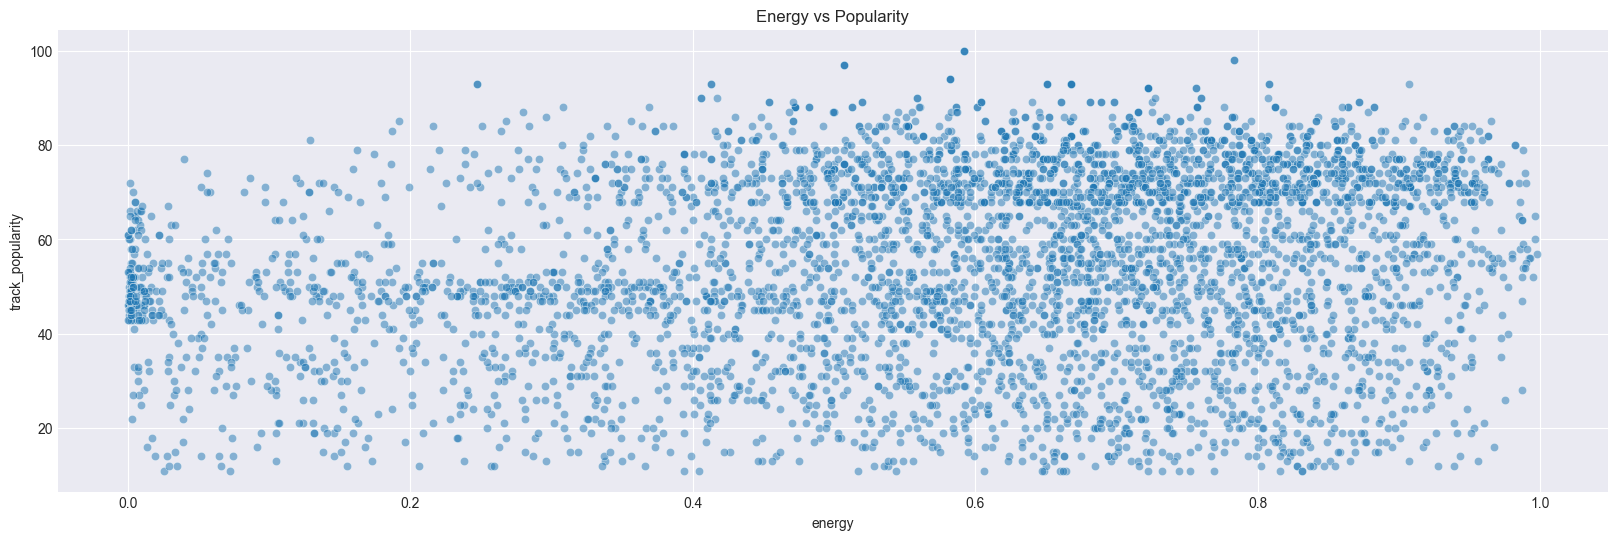

In [7]:
# Verify Hypothesis
#  
# Energy vs Popularity
sns.scatterplot(x="energy", y="track_popularity", data=df, alpha=0.5)
plt.title("Energy vs Popularity")



Text(0.5, 1.0, 'Danceability vs Popularity')

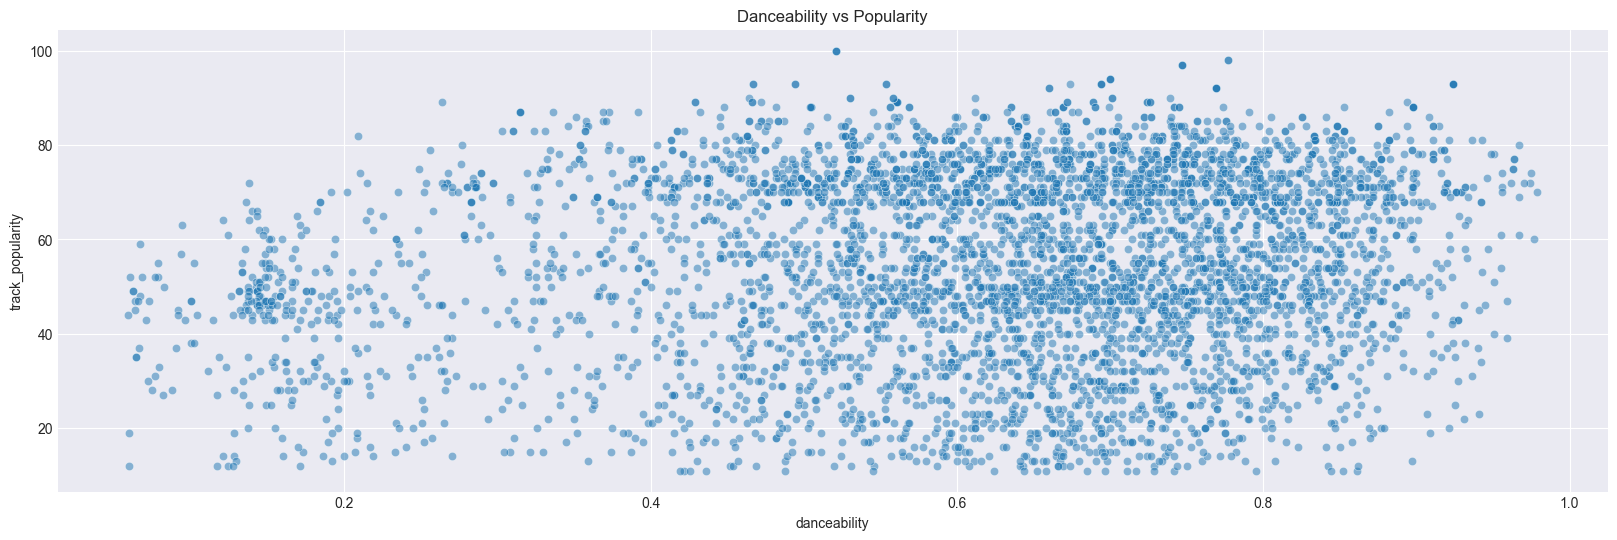

In [8]:

# Danceability vs Popularity
sns.scatterplot(x="danceability", y="track_popularity", data=df, alpha=0.5)
plt.title("Danceability vs Popularity")

Text(0.5, 1.0, 'Acousticness vs Popularity')

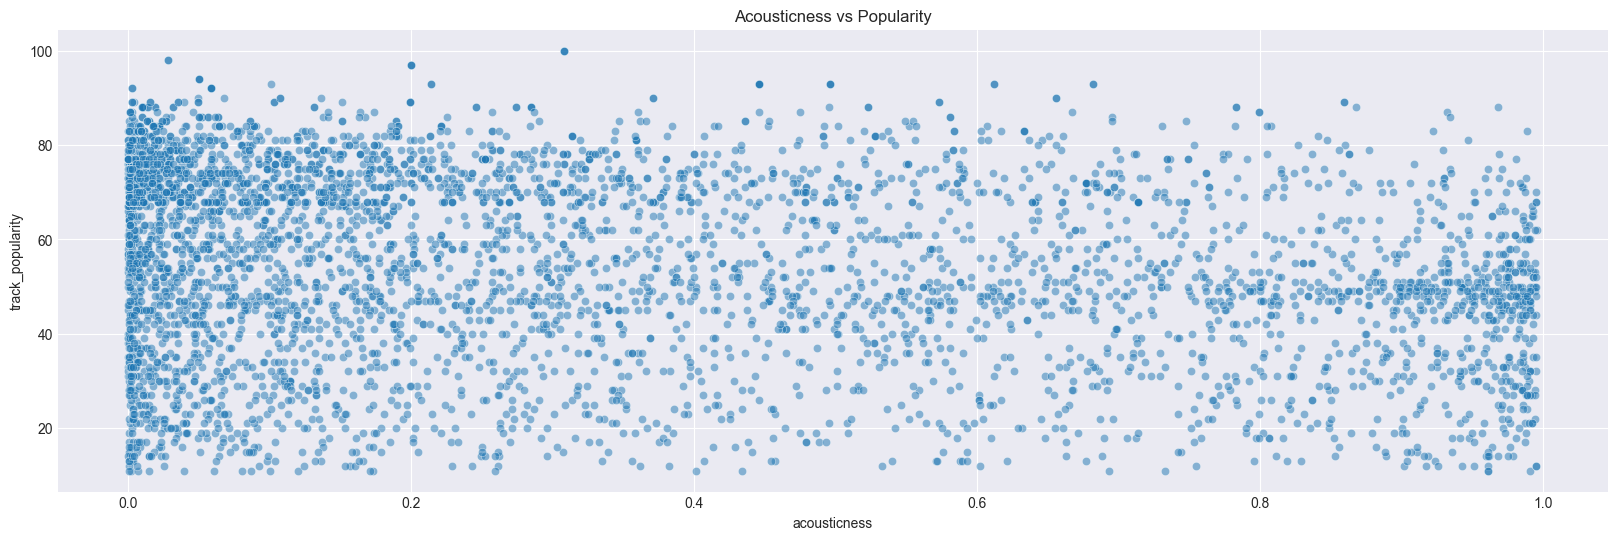

In [ ]:

# Acousticness vs Popularity
# low/no acousticness = studio-produced songs, not live or unplugged
sns.scatterplot(x="acousticness", y="track_popularity", data=df, alpha=0.5)
plt.title("Acousticness vs Popularity")

Text(0.5, 1.0, 'instrumentalness vs Popularity')

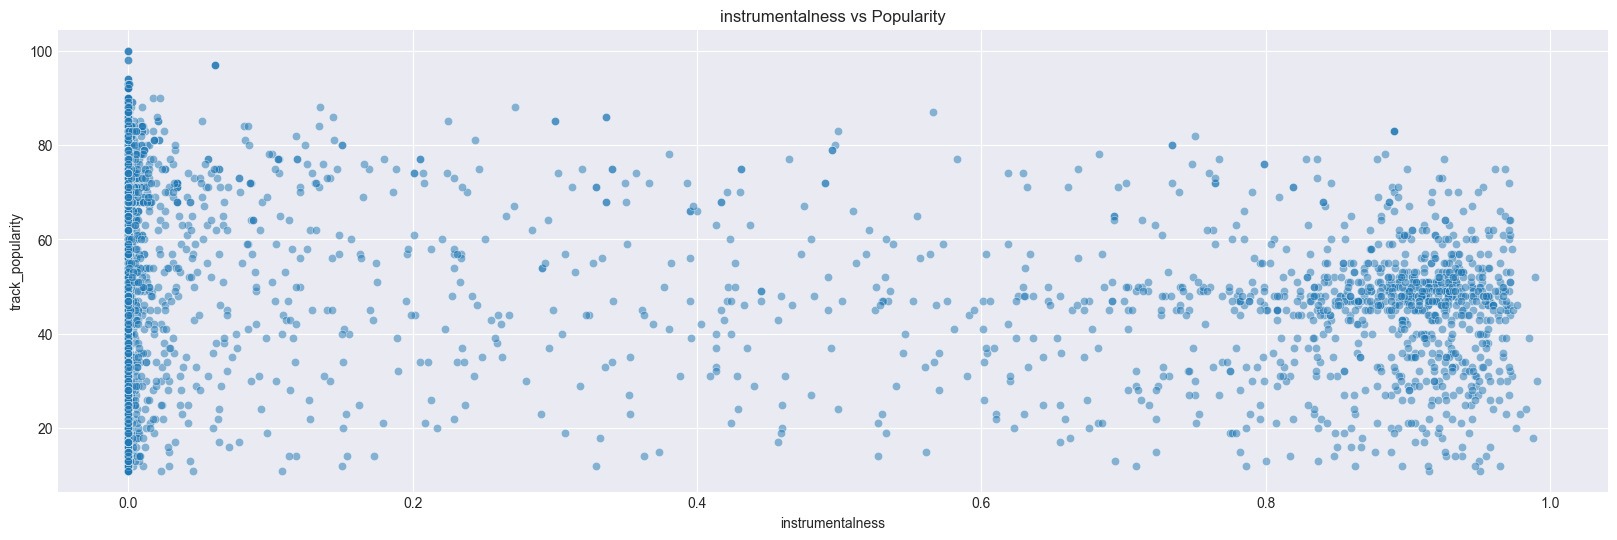

In [11]:
# instrumentalness vs Popularity
sns.scatterplot(x="instrumentalness", y="track_popularity", data=df, alpha=0.5)
plt.title("instrumentalness vs Popularity")

### Hypothesis Results:

* Lower **Acoustic** and **instrumental** songs → less popular. TRUE

* Higher **energy** and **danceability** → more popular. TRUE

<Figure size 1400x800 with 0 Axes>

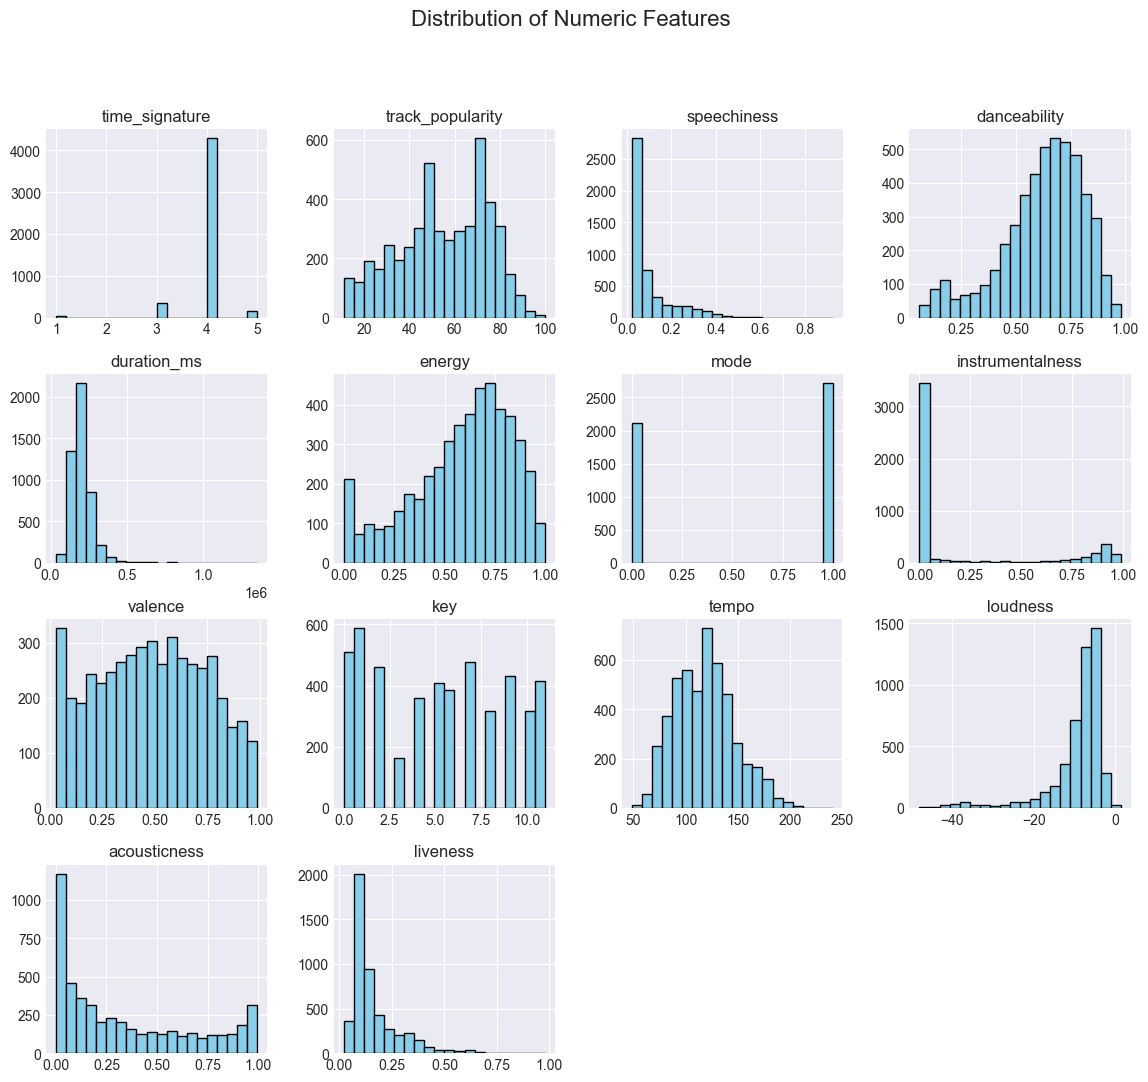

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14, 8))
df[numeric_cols].hist(bins=20, figsize=(14, 12), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


## 💡 Summary: Quick Insight

| Observation                                                                             | Meaning                                 | Possible Next Step                |
| --------------------------------------------------------------------------------------- | --------------------------------------- | --------------------------------- |
| Several features are **skewed** (speechiness, acousticness, liveness, instrumentalness) | They could distort some models          | Log-transform or normalize them   |
| Some features are **categorical in disguise** (mode, key, time_signature)               | Use one-hot encoding instead of scaling | Treat as categorical              |
| A few **outliers** exist (duration_ms, loudness)                                        | They may hurt training                  | Handle with clipping or filtering |
| `track_popularity` has good spread                                                      | Perfect for prediction target           | No change needed                  |


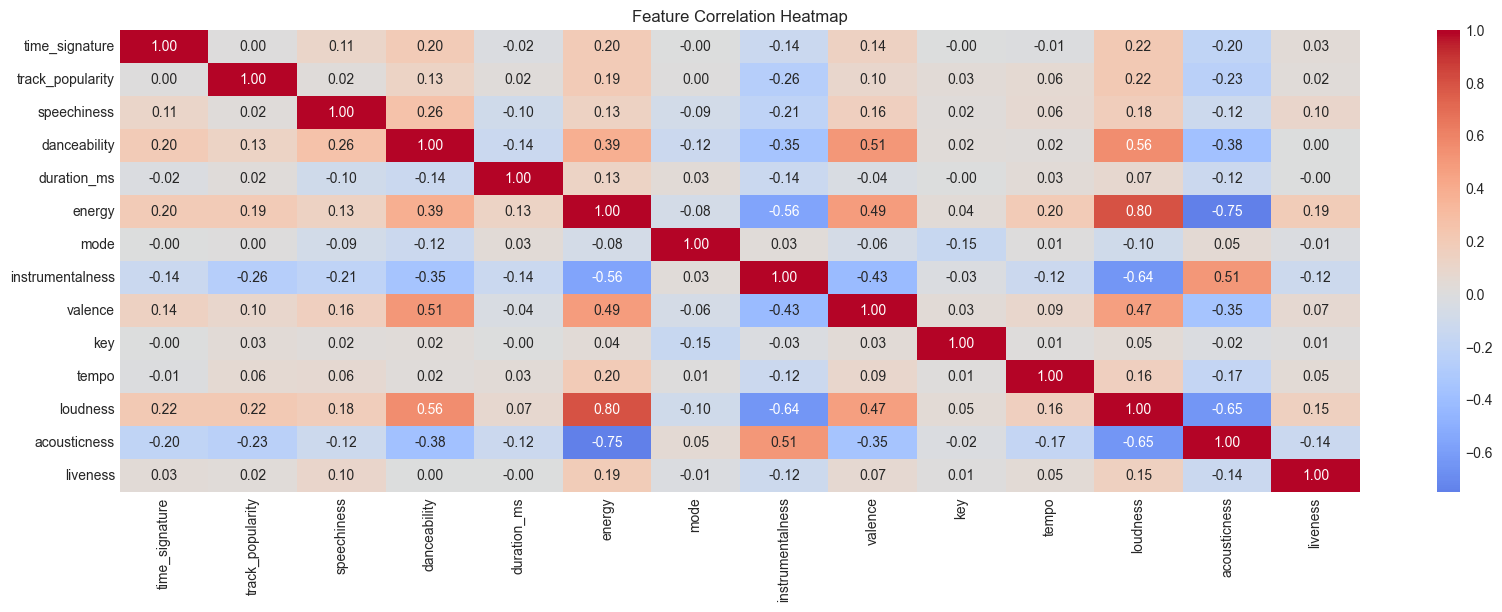

In [13]:

sns.heatmap(
    df.corr(numeric_only=True),   # correlation matrix
    cmap="coolwarm",              # color style
    center=0,                     # center around 0 (for balance)
    annot=True,                   # show numbers inside cells
    fmt=".2f"                     # format numbers to 2 decimal places
)

plt.title("Feature Correlation Heatmap")
plt.show()


# Multicollinearity

Loudness and energy

i guess that makes sense, if a song has energy it would be kinda loud right?

> You spotted true multicollinearity.

> Use VIF to confirm it, and use domain knowledge (drop loudness, keep energy) for your Linear Regression model.

In [15]:
# quick print from config, excluding the target
vif_df = compute_and_print_vif_from_config(exclude=["track_popularity"])
vif_df

2025-10-13 15:37:49 | INFO     | src.data.compute_vif | Calculating VIF for features: ['time_signature', 'speechiness', 'danceability', 'duration_ms', 'energy', 'mode', 'instrumentalness', 'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness']
2025-10-13 15:37:49 | INFO     | src.data.compute_vif | VIF calculation complete.


         feature      vif
          energy 4.233309
        loudness 4.001281
    acousticness 2.454727
    danceability 1.926743
instrumentalness 1.884168
         valence 1.658402
     speechiness 1.120534
     duration_ms 1.096335
  time_signature 1.073926
        liveness 1.058413
           tempo 1.055355
            mode 1.047679
             key 1.024845


,feature,vif
0,energy,4.233309
1,loudness,4.001281
2,acousticness,2.454727
3,danceability,1.926743
4,instrumentalness,1.884168
5,valence,1.658402
6,speechiness,1.120534
7,duration_ms,1.096335
8,time_signature,1.073926
9,liveness,1.058413


### Variance Inflation Factor (VIF) Results

VIF (Variance Inflation Factor) helps us detect multicollinearity — when features are too similar and might confuse the model.

| Feature | VIF Value | Interpretation |
|----------|------------|----------------|
| Energy | 4.23 | Moderate correlation, mainly with loudness. Acceptable. |
| Loudness | 4.00 | Moderate correlation with energy. Acceptable. |
| Others | < 3 | Low correlation. |

**Interpretation:**  
All features have VIF < 5, which is within the safe range.  
Although `energy` and `loudness` show high correlation (≈ 0.8), the VIF indicates it’s not severe enough to cause instability in our regression model.  
We will **retain all features** for now.

---

### 💡 Optional Next Step

If you want to **be extra safe**, you can try both:

* One model with all features

* Another without `loudness`

Then compare performance — Phase 5 (Evaluation & Iteration).

In [19]:
# Check for Missing Values

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

time_signature      1
speechiness         1
danceability        1
energy              1
duration_ms         1
mode                1
track_href          1
tempo               1
instrumentalness    1
id                  1
analysis_url        1
type                1
uri                 1
liveness            1
acousticness        1
track_album_name    1
loudness            1
key                 1
valence             1
dtype: int64

In [20]:
# Check Duplicates

duplicate_count = df.duplicated().sum()
duplicate_count


np.int64(43)

In [ ]:
# See which specific entries are duplicated

df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
31,3.0,68,0.0432,0.184,Classical Essentials,"Ludwig van Beethoven, Paul Lewis",315427.0,0.00527,classical,essential,...,4bNwPPpk01D8pVV9IFSBde,37i9dQZF1DWWEJlAGA9gs0,3DNRdudZ2SstnDCVKFdXxG,0.151,1.0,170.612,-37.264,0.9950,0.1730,"Beethoven: Piano Sonatas, Vol.3"
3285,3.0,68,0.0432,0.184,Classical Essentials,"Ludwig van Beethoven, Paul Lewis",315427.0,0.00527,classical,essential,...,4bNwPPpk01D8pVV9IFSBde,37i9dQZF1DWWEJlAGA9gs0,3DNRdudZ2SstnDCVKFdXxG,0.151,1.0,170.612,-37.264,0.9950,0.1730,"Beethoven: Piano Sonatas, Vol.3"
82,3.0,68,0.2980,0.567,Afro Hits,Youka,131765.0,0.63700,afrobeats,nigerian,...,6oWVZRNxLYd8K32YuRAbzz,37i9dQZF1DWX0o6sD1a6P5,1FEh2VLXCzHr4DhMLufrs5,0.882,9.0,171.264,-4.032,0.4990,0.2350,VENIN
3401,3.0,68,0.2980,0.567,Afro Hits,Youka,131765.0,0.63700,afrobeats,nigerian,...,6oWVZRNxLYd8K32YuRAbzz,37i9dQZF1DWX0o6sD1a6P5,1FEh2VLXCzHr4DhMLufrs5,0.882,9.0,171.264,-4.032,0.4990,0.2350,VENIN
831,4.0,68,0.0280,0.651,Classic Blues,Michael Jackson,345600.0,0.40200,blues,classic,...,3OBhnTLrvkoEEETjFA3Qfk,5arFyak5nEhUf9kpsssXxT,3AoeaZs8dFemFJr3JdzOL0,0.258,11.0,119.873,-9.303,0.6390,0.0765,"HIStory - PAST, PRESENT AND FUTURE - BOOK I"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,4.0,68,0.4690,0.942,Chill Hop,Sainté,144000.0,0.44100,hip-hop,chill,...,02gUzFCFgKdsj8p1KcnASN,37i9dQZF1EIf4OaZ1XTJYw,7dbyaRWWFvB9UG2vcwTd3J,0.925,11.0,135.028,-11.448,0.4930,0.1380,Local Mvp
2405,5.0,68,0.0646,0.564,Vaporwave Essentials,Home,212939.0,0.75400,electronic,vaporwave,...,1GI4xblPLj1oISUaQhj26P,37i9dQZF1EIdOtkojz5FWw,4E1Zf6j2VSoRPiVBnUCjat,0.457,8.0,170.084,-8.849,0.0424,0.2240,Odyssey
4767,5.0,68,0.0646,0.564,Vaporwave Essentials,Home,212939.0,0.75400,electronic,vaporwave,...,1GI4xblPLj1oISUaQhj26P,37i9dQZF1EIdOtkojz5FWw,4E1Zf6j2VSoRPiVBnUCjat,0.457,8.0,170.084,-8.849,0.0424,0.2240,Odyssey
1710,5.0,68,0.1380,0.490,Meditative Vibes,"Ayo Maff, Fireboy DML",180594.0,0.65100,ambient,meditative,...,3RShBBcnQmqfmBJgmfz3or,3kEpLybbAlVUVimW5Evijb,5Wxkvvb6pLky16pwq4gBI3,0.567,11.0,67.813,-6.259,0.7140,0.1080,Dealer


In [ ]:
# TODO: version this to src/data/validate_data.py